In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# multidimensional arrays
import numpy as np

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

import math as mt

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Exercise 07.1

In this first exercise the goal is to understand something more about the calculation of the uncertainties with the blocking method. 
In order to apply this method it is necessary to know how many steps we have to put in each block. The amount of steps has to be large enough so that the values in each block are uncorrelated. If we compute the autocorrelation function definided as 
$$ \chi(t)=\frac{\langle \ x(\ \bar{t} \ ) \cdot x(\ \bar{t}+t \ ) \ \rangle -\langle x( \ \bar{t} \ ) \rangle \cdot \langle x( \ \bar{t}+ t \ ) \rangle }{\sigma_ x^2}$$

where $t= \Delta t$ is the MC time between two consecutive measurements, we can find out the time ($t_c$) expressed in steps after which the function goes to zero (we expect an exponential behaviour $\chi (t) \approx e ^{- \frac{t}{t_c}}$) and, consequently, each block should have twice this number of steps. 

In order to plot the autocorrelation function for the three phases (solid, liquid and gas), we need to print $M=5x10^5$ instantaneous values of the two thermodynamic propiertis in questio, the potential energy and the pression. But, first of all, the equilibration is needed. For this part for all three phases I decided to run the simulation for $1000$ steps and, then, save the last configuration in *config.final*. After copying *config.final* in *config.0*, I ran for each phase a simulation long $10^5$ steps. We can see from the following plots that $1000$ steps were enough for the equilibration and that the file containing the $10^5$ steps shows that the phases are equilibrated. 


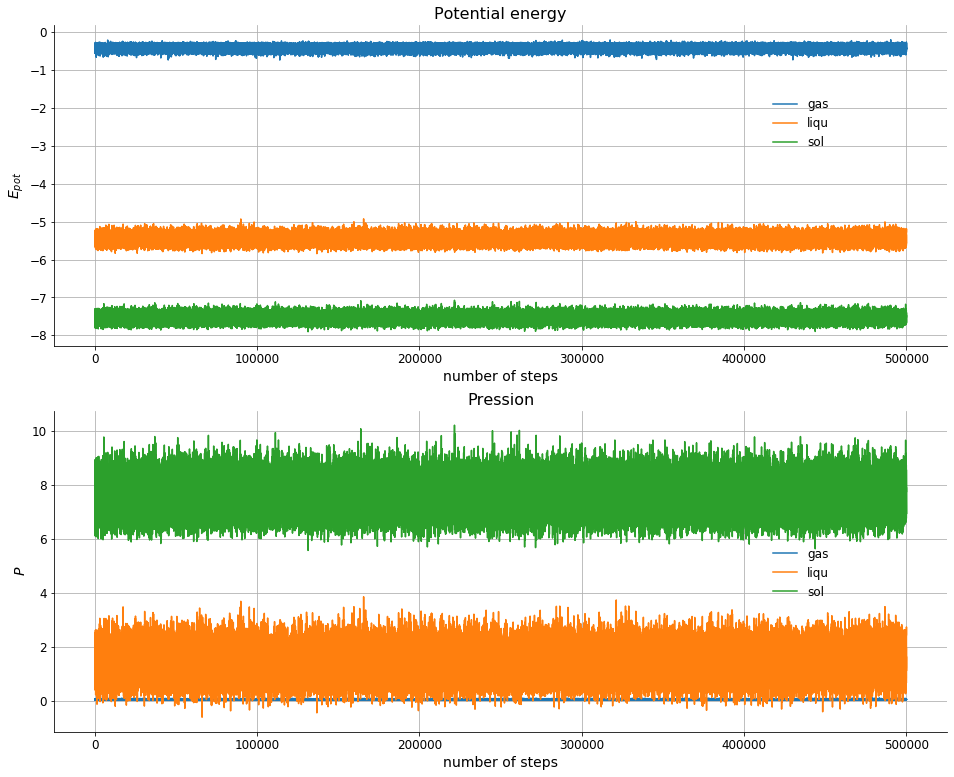

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(16, 13))
steps = 500001

x = np.linspace(0,steps,steps)
phase = ['gas', 'liqu', 'sol']
f_epot = np.zeros((3,steps))
f_pres = np.zeros((3,steps))

for i in range(3):
    f_epot[i,:] = np.loadtxt(f"risultati/{phase[i]}_instant_epot.out", usecols=(0), unpack='true')
    f_pres[i,:] = np.loadtxt(f"risultati/{phase[i]}_instant_pres.out", usecols=(0), unpack='true')

for i in range(3):
    ax[0].plot(x,f_epot[i,:], label = f"{phase[i]}")
    ax[0].set_xlabel(r"number of steps")
    ax[0].set_ylabel(r"$E_{pot}$")
    ax[0].grid(True)
    ax[0].legend(loc=(0.8,0.6), frameon = False)
    ax[0].set_title(f"Potential energy")
    
for i in range(3):
    ax[1].plot(x,f_pres[i,:], label = f"{phase[i]}")
    ax[1].set_xlabel(r"number of steps")
    ax[1].set_ylabel(r"$P$")
    ax[1].grid(True)
    ax[1].legend(loc=(0.8,0.4), frameon = False)
    ax[1].set_title(f"Pression")
    

The following Python script is written to evaluate the autocorrelation function and save it in a file, but for computational reason I wrote an equivalent code in C++ (*autocorr.cpp*) that gives the same results. 

In [2]:
"""def funz_autocorr(valore, passo, dime):
    global prodotto 
    global somma
    global somma2 
    global somma_parz 
    global somma_parz2 
    prodotto = 0
    somma = 0
    somma2 = 0
    somma_parz = 0
    somma_parz2 = 0
    
    for i in range(dime - passo):
        prodotto += valore[i]*valore[i+passo]
        somma_parz += valore[i]
        somma_parz2 += valore[i+passo]
        
    for i in range(dime):
        somma += valore[i]
        somma2 += pow(valore[i],2)
        
    prodotto /=(dime - passo)
    somma_parz /=(dime - passo)
    somma_parz2 /=(dime - passo)
    somma2 /=(dime)
    devstd = (somma2-pow(somma/(dime),2))
    return (prodotto - somma_parz*somma_parz2)/devstd"""

In [ ]:
"""steps = 500001
energy = np.zeros((3,steps))
pression = np.zeros((3,steps))
phase = ['sol', 'liqu', 'gas']

for i in range(3):
    energy[i,:] = np.loadtxt(f"risultati/{phase[i]}_instant_epot.out", usecols=(0), unpack='true')
    pression[i,:] = np.loadtxt(f"risultati/{phase[i]}_instant_pres.out", usecols=(0), unpack='true')

energy_autocorr = np.zeros((3,1000))
pression_autocorr = np.zeros((3,1000))

for i in range(3):
    for t in range(1000):
        energy_autocorr[i,t] = funz_autocorr(energy[i,:],t, steps)
        pression_autocorr[i,t] = funz_autocorr(pression[i,:],t,steps)
        
for i in range(3):
    np.savetxt(f"risultati/{phase[i]}_press_autocorr.txt",pression_autocorr[i,:])
    np.savetxt(f"risultati/{phase[i]}_epot_autocorr.txt",energy_autocorr[i,:])"""

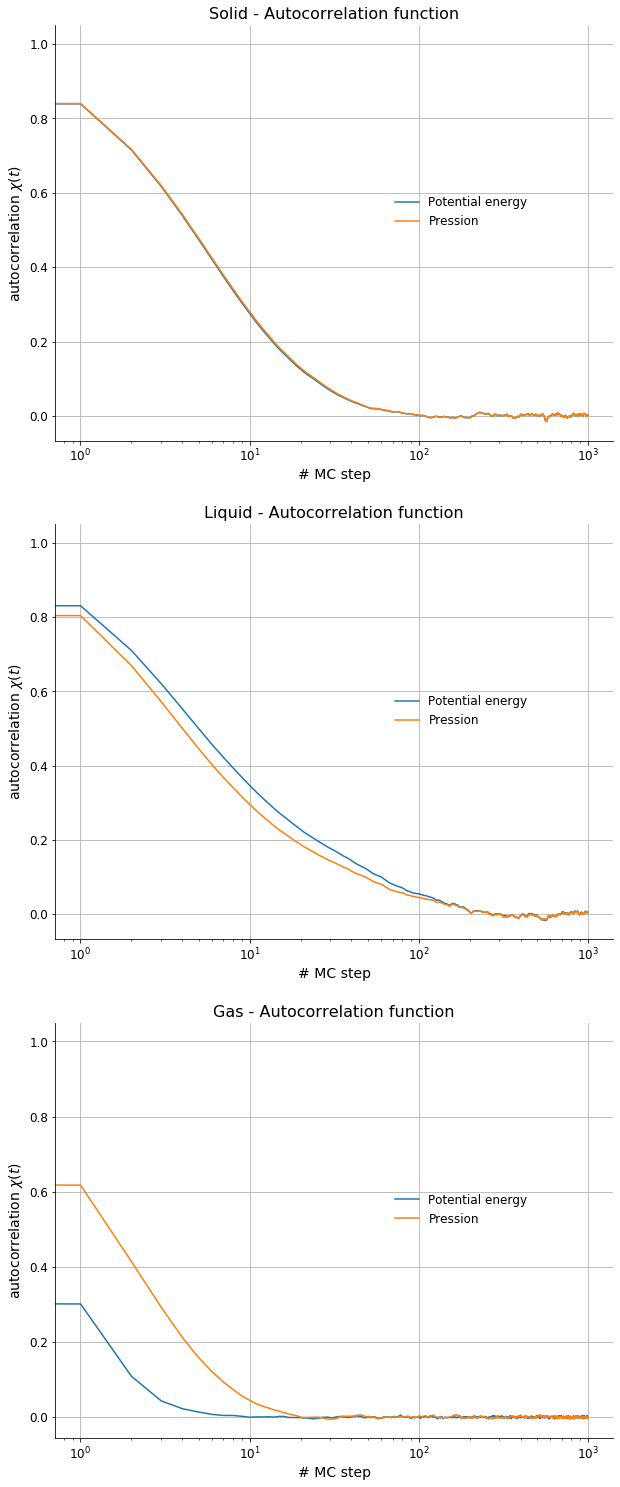

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(10, 26))

x = np.linspace(0,1000,1000)
autocorr_epot = np.zeros((3,1000))
autocorr_pres = np.zeros((3,1000))
phase = ['sol','liqu', 'gas']
title = ['Solid - Autocorrelation function', 'Liquid - Autocorrelation function', 'Gas - Autocorrelation function']

for i in range(3):
    autocorr_epot[i,:] = np.loadtxt(f"risultati/{phase[i]}_press_autocor.out", usecols=(0), unpack='true')
    autocorr_pres[i,:] = np.loadtxt(f"risultati/{phase[i]}_epot_autocor.out", usecols=(0), unpack='true')

for i in range(3):
    axx = ax[i]
    axx.plot(x,autocorr_epot[i,:], label = "Potential energy")
    axx.plot(x,autocorr_pres[i,:], label = "Pression")
    axx.set_title(title[i])
    axx.set_xlabel(r'# MC step')
    axx.set_xscale('log')
    axx.set_ylabel('autocorrelation $\chi(t)$')
    axx.legend(loc=(0.6, 0.5), frameon=False)
    axx.grid(True)

From this graphs we can see that the time that has to pass before two values of one of the thermodynamic propierties are uncorrelated is approximately equal to $100$ steps for solid, $200$ for liquid and $20$ for gas. So the number of steps in a single block must be twice or more. 

Another interesting feature that we can compute from the blocking method is the value of the error in the last block as a function of the number of steps $L$ contained in each block. By computing this method at $100$ different value of $L$ from $10$ to $5000$ we can see from the following plots that the error, initially, increases and, then, it oscillates around a certain value. This is not unexpected. In fact, the more the steps are the more uncorrelated the values inside a block become and, consequently, the error increases until it reaches a value at which the correlation is minimal. This is the thresold value for $L$ that we are looking for. 

The thresold value is: 
- for solid: $ L \gtrsim 1100$
- for liquid: $ L \gtrsim 400$
- for gas: $ L \gtrsim 110$

**Note:** The calculation of the error as a function of $L$ can be done with the following Python script, but  I wrote a programm in C++ to make it quicker, because with $100$ different value of $L$ this script is extremely slow. 

In [28]:
"""def error(AV,AV2,n):
    if n==0 or n==1: 
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/(n-1)) 

def block_average(M, L, N, valore):
    x = np.arange(N)      
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)

    for i in range(N): 
        _sum = 0
        for j in range(L): 
            k = j+i*L 
            _sum += valore[k]
        ave[i] = _sum/L
        av2[i] = (ave[i])**2 

    for i in range(N): 
        for j in range(i+1): #ciclo interno che va a sommare gli esperimenti fino a quel momento
            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j (accumolo valor medio)
            su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty

    return err_prog[N-1]"""

In [ ]:
"""energy = np.zeros((3,steps))
pression = np.zeros((3,steps))
phase = ['sol', 'liqu', 'gas']

L_m=10
L_M=5000

for i in range(3):
    energy[i,:] = np.loadtxt(f"risultati/{phase[i]}_instant_epot.out", usecols=(0), unpack='true')
    pression[i,:] = np.loadtxt(f"risultati/{phase[i]}_instant_pres.out", usecols=(0), unpack='true')

energy_blkave = np.zeros((3,1000))
pression_blkave = np.zeros((3,1000))

for i in range(3):
    for t in range(101):
        L = int(L_m + i*(L_M-L_m)/100)
        N = int(steps/L)
        energy_blkave[i,t] = block_average(steps,L,N,energy[i,:])
        pression_blkave[i,t] = block_average(steps,L,N,pression[i,:])

for i in range(3):
    np.savetxt(f"risultati/{phase[i]}_blkave_press.out",pression_autocorr[i,:])
    np.savetxt(f"risultati/{phase[i]}_blkave_epot.out",energy_autocorr[i,:])"""

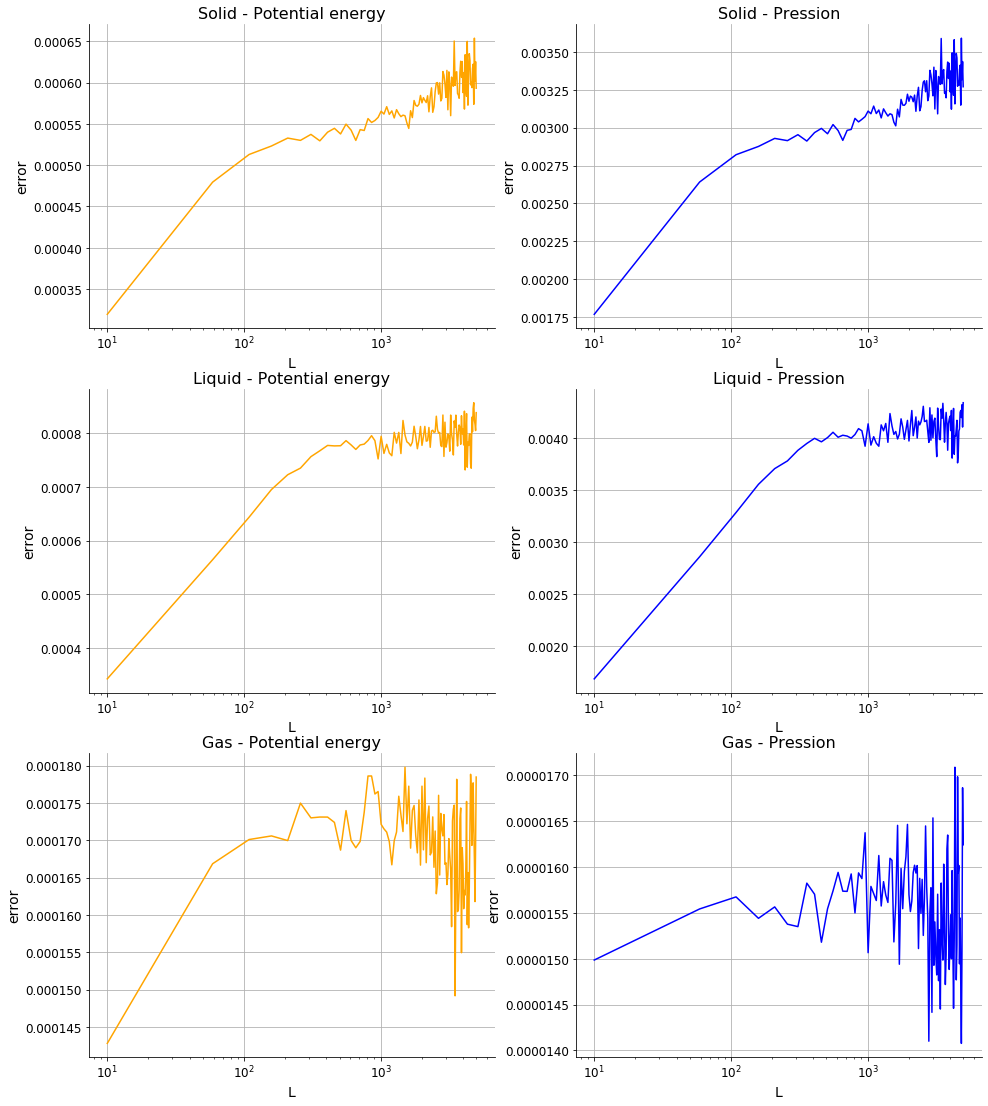

In [33]:
fig, ax = plt.subplots(3, 2, figsize=(16, 19))
L_steps=101

phase = ['sol','liqu','gas']
error_epot = np.zeros((3,L_steps))
error_pres = np.zeros((3,L_steps))
title = ['Solid', 'Liquid', 'Gas']

for i in range(3):
    x, error_epot[i,:] = np.loadtxt(f"risultati/{phase[i]}_blkave_epot.out", usecols=(0,1), unpack='true')
    x, error_pres[i,:] = np.loadtxt(f"risultati/{phase[i]}_blkave_press.out", usecols=(0,1), unpack='true')

for i in range(3):
    for j in range(2):
        axx = ax[i,j] 
        if(j==0): 
            axx.plot(x,error_epot[i,:], color ='orange')
            axx.set_title(f"{title[i]} - Potential energy")
        else: 
            axx.plot(x,error_pres[i,:],color ='b')
            axx.set_title(f"{title[i]} - Pression")
        axx.set_xlabel(r"L")
        axx.set_ylabel(r"error")
        axx.set_xscale('log')
        axx.grid(True)


# Exercise 07.2 07.3 07.4

In the exercise $07.2$ and $07.3$ it was asked to include in the code NTV Monte Carlo and in the code NVE Molecular Dynamics the calculation of the radial distribution function, $g(r)$, where $r$ is the radial distance among particles, with $r \in \left[ 0; L/2\right]$, and provide an average value of $g(r)$ in each block (*output.gofr.0*) and a final average value of $g(r)$ with statistical uncertainties (*output.gave.0*). In exercise $07.4$ one of the request is to compare in SI units the function $g(r)$ calculated by the two different codes.

The radial distribution function (or pair correlation function) $g(r)$ in a system of particles describes how density varies as a function of distance from a reference particle. In other words, if we consider a particle in the origin of the reference system, the density in function of the distance $r$ from that particle is $\rho(r)=\rho g(r)$, where $\rho = N/V$.
The analytical expression for the radial density is:
$$g(r)=\frac{1}{\rho N \Delta V (r)} \langle \sum_{i=1}^N \sum_{j =1, j\neq i}^N \delta \ ( \ r-|\vec r_i -\vec r_j| \ ) \ \rangle$$

where $\Delta V(r)=\frac{4\pi}{3}\left[(r+dr)^3-r^3\right]$ is the volume of the shell of thickness $dr$.

In order to implement this formula, we consider half of the box side $L_{box}$ divided into $n=100$ bins in order to obtain a descrete sequence of positions $r_0,r_1, \dots , r_n \ \in [0, L_{box}/2]$ with the bin size corresponding to the infinitesimal distance $dr$. Then, when two particles are found at distance between $r_i$ and $r_i+dr$ we need to fill an histogram increasing the bin of $r_i$ by 2, because we are counting both particles. At the end we normalize the histogram with the quantity $\rho N \Delta V (r)$.

In the following plots, the distribution function $g(r)$ computed with the two different codes is shown for each of the three phases. The two curves generated from the two different codes are in good agreement (expect for the gas phase, probably due to intrinsic difficulty in evaluating the gas phase).


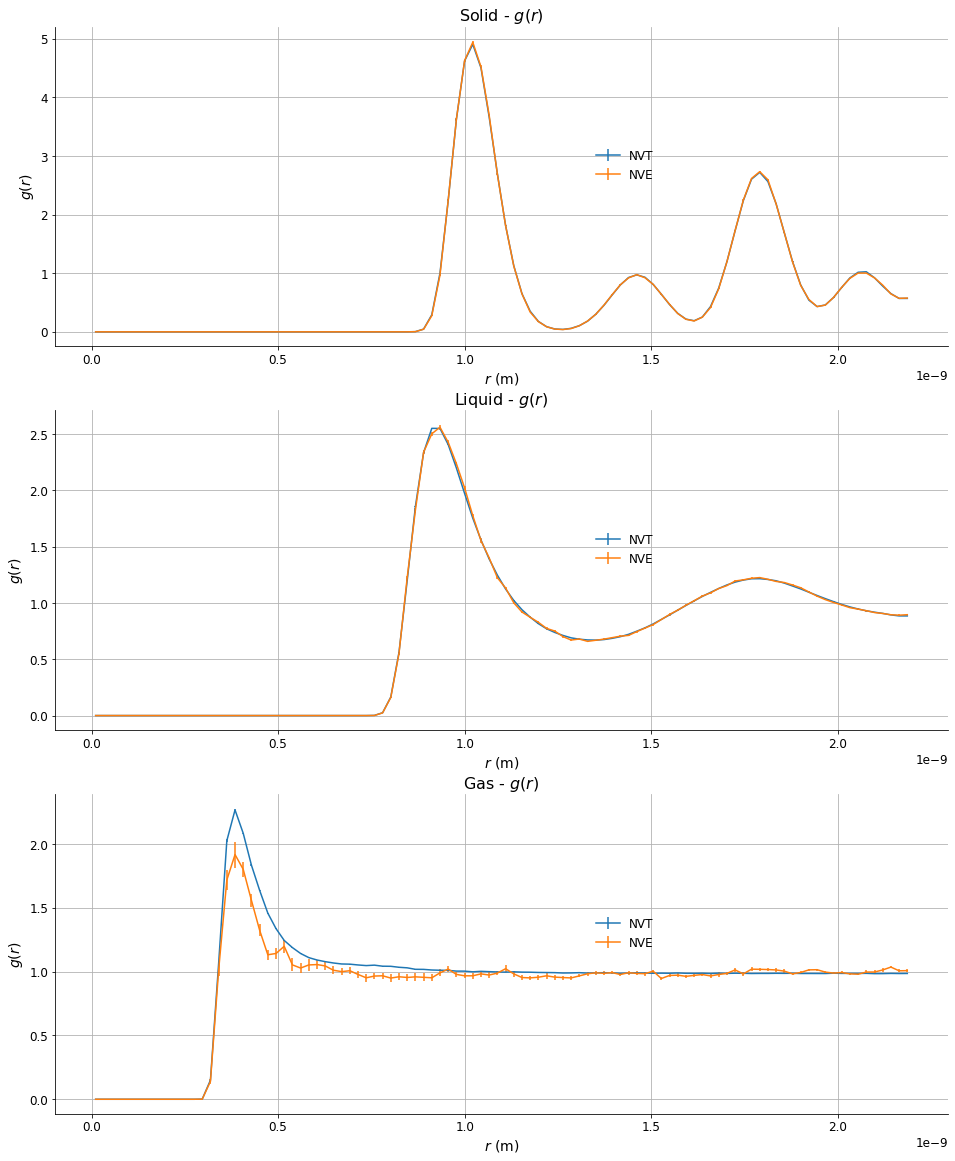

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(16, 20))
nbins = 100

g_NTV = np.zeros((3,nbins))
g_NVE = np.zeros((3,nbins))
error_NTV = np.zeros((3,nbins))
error_NVE = np.zeros((3,nbins))
phase = ['sol','liqu', 'gas']
title = [r'Solid - $g(r)$', r'Liquid - $g(r)$', r'Gas - $g(r)$']

for i in range(3):
    r, g_NTV[i,:], error_NTV[i,:] = np.loadtxt(f"risultati/NVT{phase[i]}_output.gave.0", usecols=(1,2,3), unpack='true')
    r, g_NVE[i,:], error_NVE[i,:] = np.loadtxt(f"risultati/NVE{phase[i]}_output.gave.0", usecols=(1,2,3), unpack='true')

for i in range(3):
    axx = ax[i]
    axx.errorbar(r*(0.34e-9),g_NTV[i,:], error_NTV[i,:], label = "NVT")
    axx.errorbar(r*(0.34e-9),g_NVE[i,:], error_NVE[i,:], label = "NVE")
    axx.set_title(title[i])
    axx.set_xlabel(r'$r$ (m)')
    axx.set_ylabel(r"$g(r)$")
    axx.legend(loc=(0.6, 0.5), frameon=False)
    axx.grid(True)

Tha last exercise also requested to show the  average values and uncertainties for the potential energy per particle, $U/N$, and the pressure $P$ for the three phases. I chose to calculate the averages over $30$ blocks each with $3000$ steps for solid, $2000$ for liquid and $1000$ for gas. 

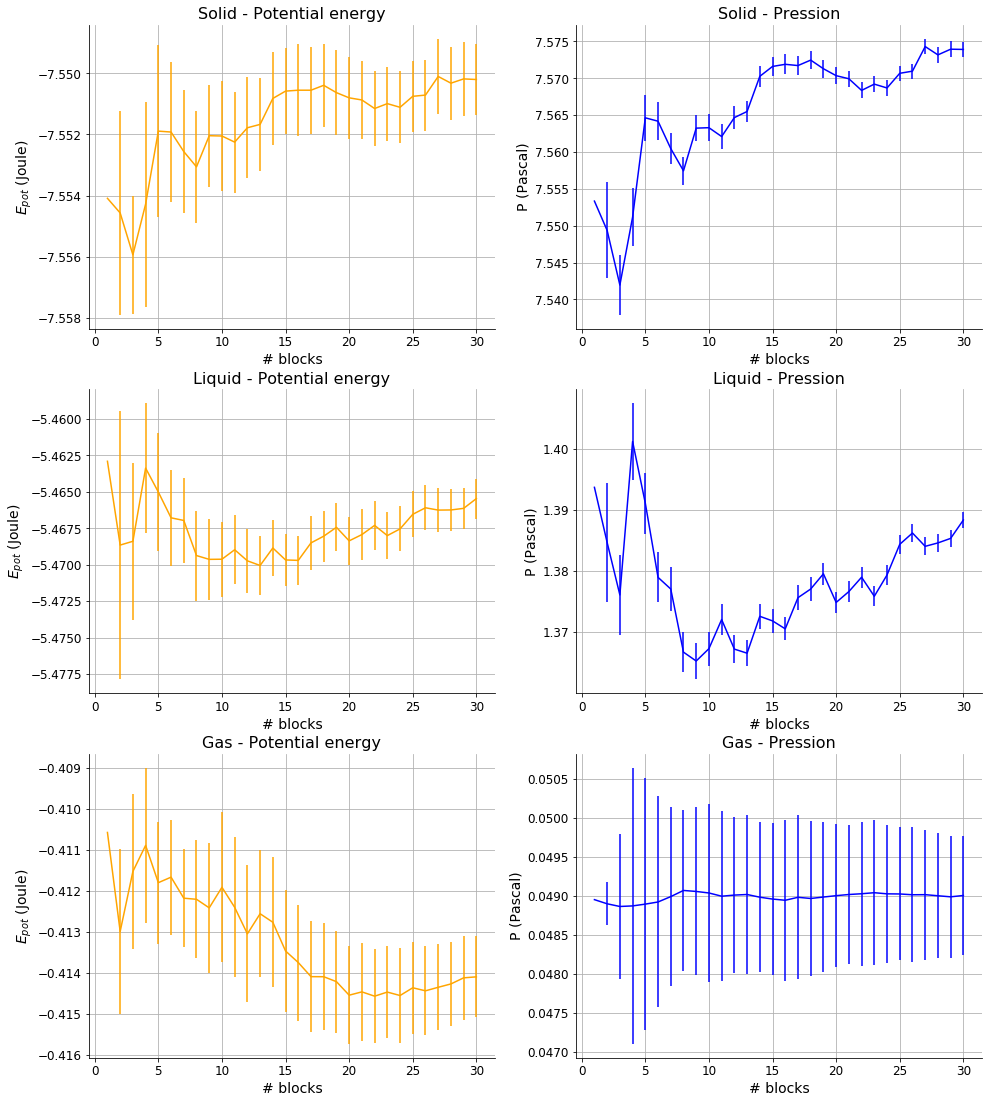

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(16, 19))
nblk = 30

epsilon = 1#120*1.380649e-23 
sigma = 1#0.34e-9

_epot = np.zeros((3,nblk))
_pres = np.zeros((3,nblk))
er_epot = np.zeros((3,nblk))
er_pres = np.zeros((3,nblk))

phase = ['sol','liqu','gas']
title = ['Solid', 'Liquid', 'Gas']
rescale = [epsilon, epsilon/(sigma**3)]

for i in range(3):
    x, _epot[i,:], er_epot[i,:] = np.loadtxt(f"risultati/{phase[i]}_output.epot.0", usecols=(0,2,3), unpack='true')
    x, _pres[i,:], er_pres[i,:] = np.loadtxt(f"risultati/{phase[i]}_output.pres.0", usecols=(0,2,3), unpack='true')

for i in range(3):
    for j in range(2):
        axx = ax[i,j] 
        if(j==0): 
            axx.errorbar(x,_epot[i,:]*rescale[j], er_epot[i,:]*rescale[j], color ='orange')
            axx.set_title(f"{title[i]} - Potential energy")
            axx.set_ylabel(r"$E_{pot}$ (Joule)")
        else: 
            axx.errorbar(x,_pres[i,:]*rescale[j], er_pres[i,:]*rescale[j],color ='b')
            axx.set_title(f"{title[i]} - Pression")
            axx.set_ylabel(r"P (Pascal)")
        axx.set_xlabel(r"# blocks")
        axx.grid(True)
